# Regression-Prediction of Stores Sales

In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load The Data

store_data=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
store_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
store_data.shape  #check the number of rows and columns in dataset

(14204, 12)

In [4]:
store_data.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
store_data.describe() #statistical description of numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
store_data.dtypes #check the data type of each column

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
store_data.head() #display first five records

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
store_data.tail() #display last five records

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [9]:
store_data.sample(15) # display a random sample of size 15 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4162,FDP57,17.500,Low Fat,0.082291,Snack Foods,102.9990,OUT046,1997,Small,Tier 1,Supermarket Type1,2992.7710
1295,FDH24,20.700,Low Fat,0.021427,Baking Goods,156.5288,OUT035,2004,Small,Tier 2,Supermarket Type1,1571.2880
6344,FDQ19,7.350,Regular,0.024044,Fruits and Vegetables,241.0512,OUT010,1998,Medium,Tier 3,Grocery Store,242.3512
3098,FDY02,8.945,Regular,0.087221,Dairy,263.9910,OUT027,1985,Medium,Tier 3,Supermarket Type3,9467.6760
11943,NCC19,6.570,Low Fat,0.097429,Household,194.5820,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
7274,FDC28,7.905,Low Fat,0.064709,Frozen Foods,109.1254,OUT017,2007,Small,Tier 2,Supermarket Type1,1627.8810
12885,FDY14,10.300,Low Fat,0.070182,Dairy,264.6226,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
44,FDL50,12.150,Regular,0.042278,Canned,126.5046,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138
9293,FDH53,20.500,Regular,0.019230,Frozen Foods,80.9592,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
2605,FDU20,19.350,Regular,0.021579,Fruits and Vegetables,120.5098,OUT017,2007,Small,Tier 2,Supermarket Type1,1807.6470


-
Check null values

In [10]:
store_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

- Interpretation- 5681 missing values are present in the Item_Outlet_Sales column

- Imputation of missing values

In [11]:
sales_mean=store_data['Item_Outlet_Sales'].mean()  # find mean of Item_Outlet_Sales column
sales_mean

2181.2889135750365

In [12]:
store_data['Item_Outlet_Sales'].fillna(sales_mean,inplace=True) # fill the missing values with the mean

In [13]:
store_data.isnull().sum() # after imputation again check missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Now, No missing values are present in the dataset

# EDA-Exploratory Data Analysis

# Plot Histogram for numerical coulmns

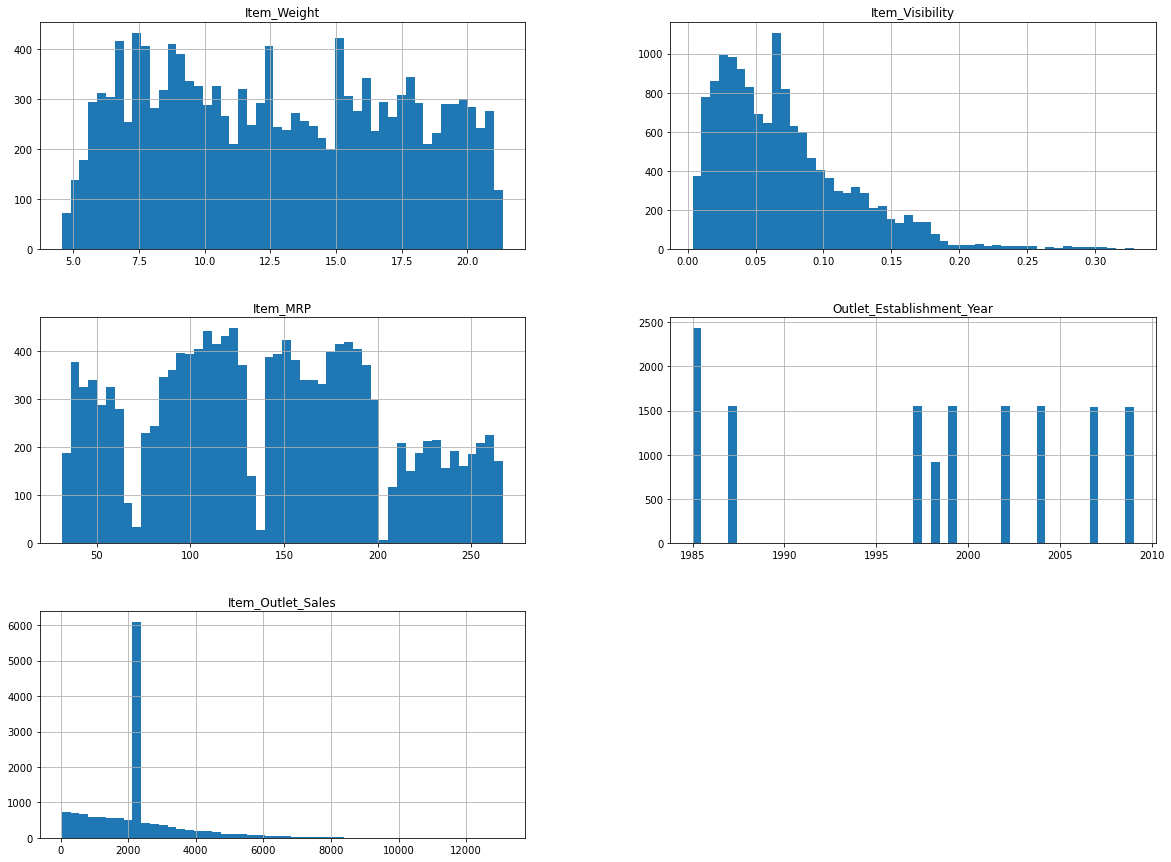

In [14]:
store_data.hist(bins=50,figsize=(20,15));

# Bar graph for Categorical Coumns

- check the unique values in categorical columns

In [15]:
store_data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
store_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
store_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
store_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
store_data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [20]:
store_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [21]:
store_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
store_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

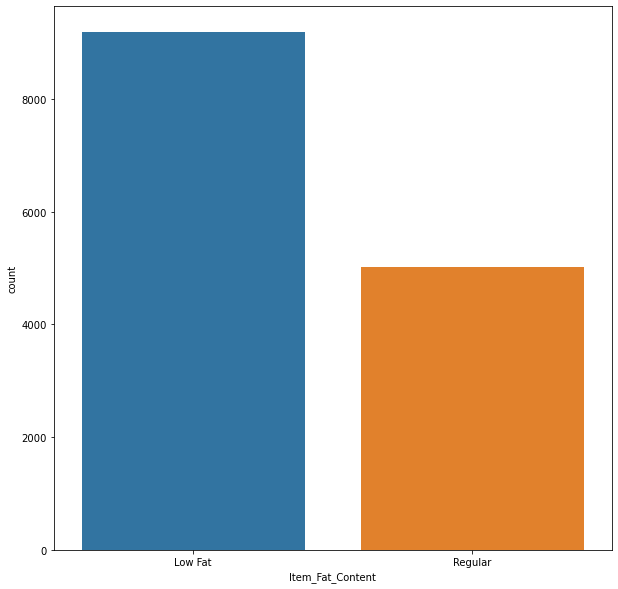

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x='Item_Fat_Content',data=store_data)
plt.show()


- Items which contains Low Fat are maximum

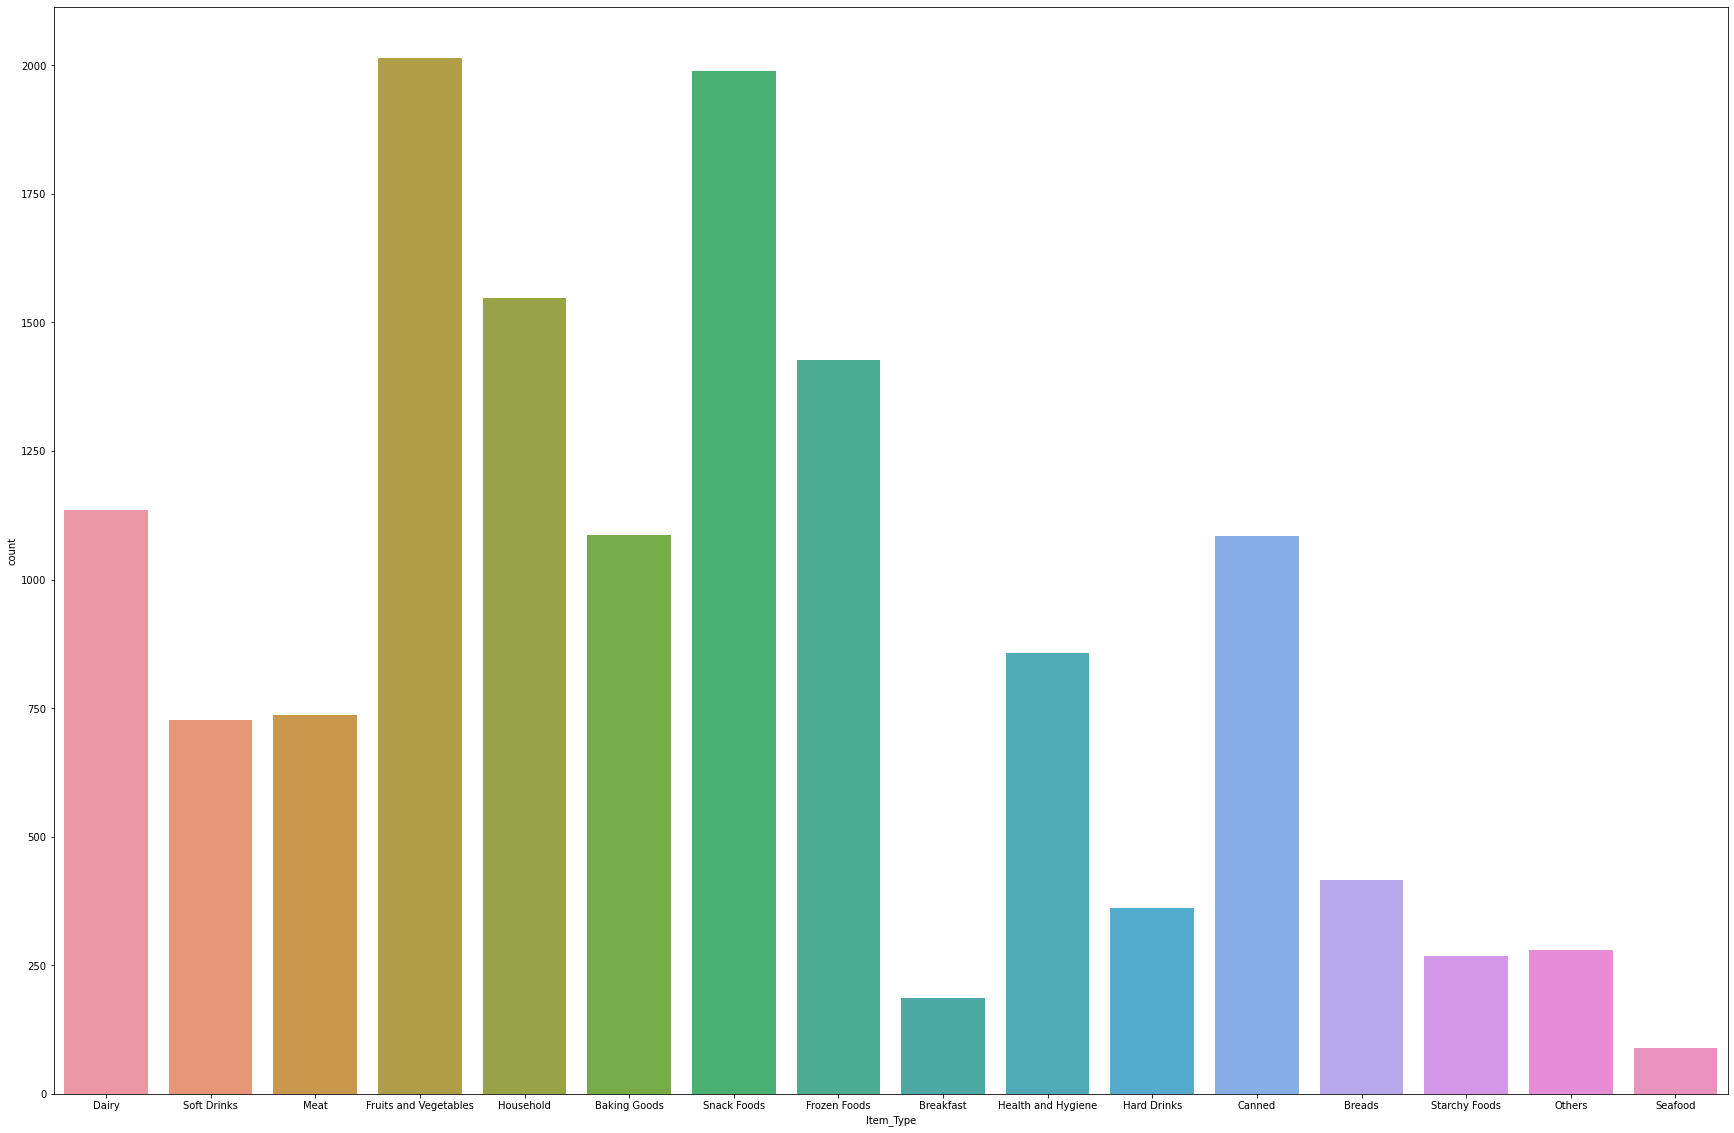

In [24]:
plt.figure(figsize=(30,20))    # for categorical data
sns.countplot(x='Item_Type',data=store_data)
plt.show()

- Fruits and Vegetables,Snack Foods types of items are high

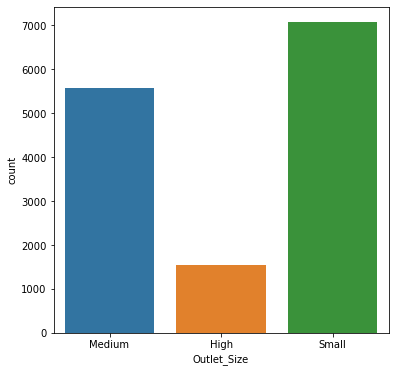

In [25]:
plt.figure(figsize=(6,6))    # for categorical data
sns.countplot(x='Outlet_Size',data=store_data)
plt.show()

- Stores of small size are maximum

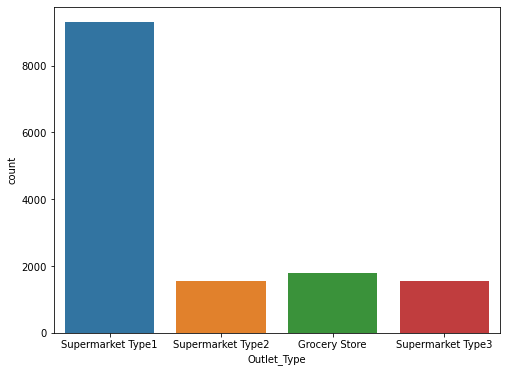

In [26]:
plt.figure(figsize=(8,6))    # for categorical data
sns.countplot(x='Outlet_Type',data=store_data)
plt.show()

- Supermarket Type1 are maximum

In [27]:
store_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

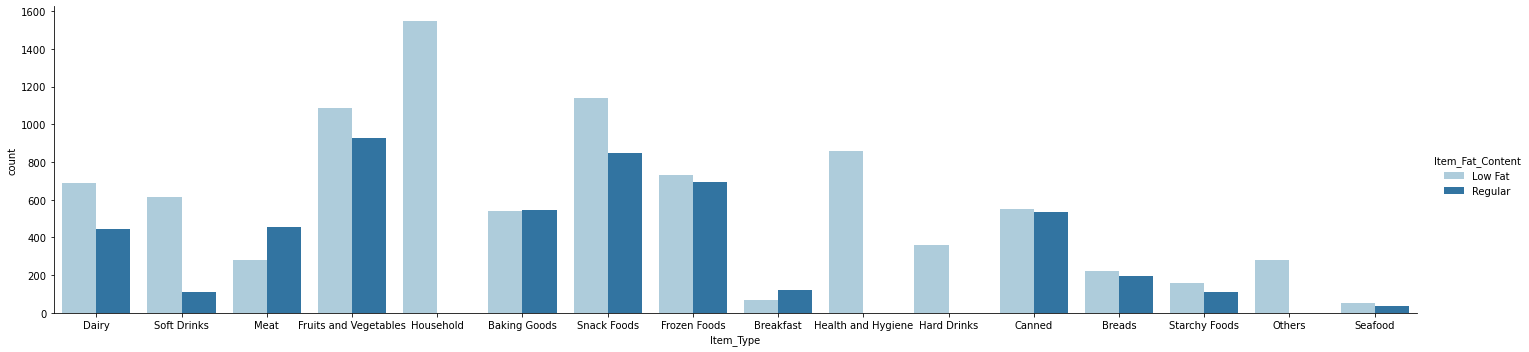

In [28]:
# Barplot Item_Fat_Content per Item_Type

sns.catplot(data=store_data,x='Item_Type',hue='Item_Fat_Content',kind='count',aspect=4,palette='Paired')

- Household items have highest low fat and fruits and vegetables items have regular fat 

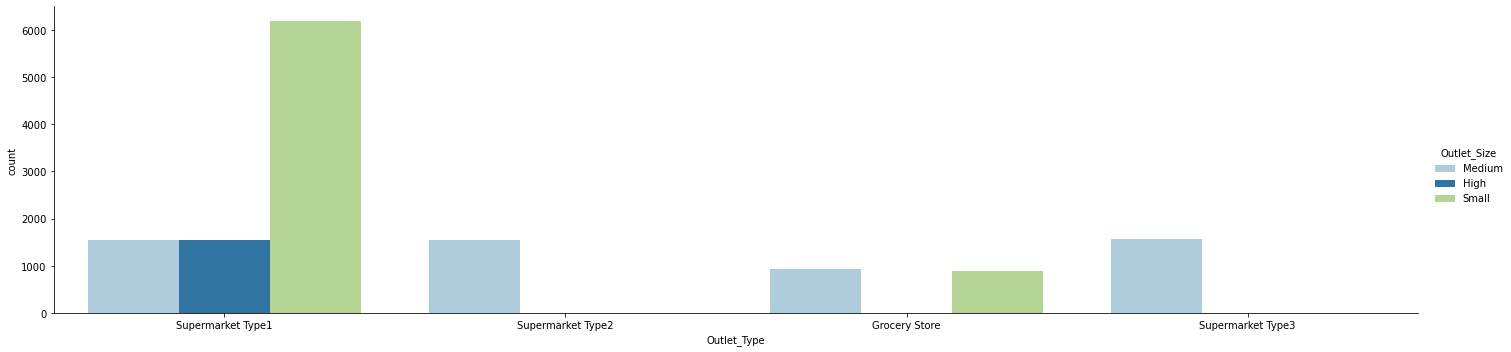

In [29]:
# outletsize per outlet type
sns.catplot(data=store_data,x='Outlet_Type',hue='Outlet_Size',kind='count',aspect=4,palette='Paired');

- Outlets of Supermarket Type1 had small size outlets

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

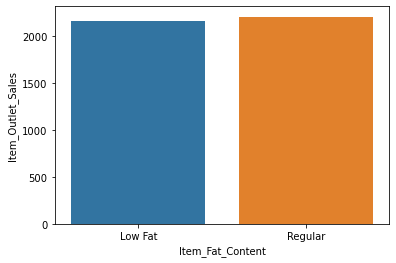

In [30]:
# Bargraph Item_Outlet_Sales per Item_Fat_Content

sns.barplot(x = 'Item_Fat_Content', y ='Item_Outlet_Sales',data=store_data,ci=None)

- Items with low fat and regular fat have almost equal sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

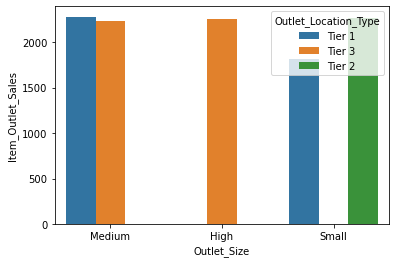

In [31]:
#bargraph size_location_sales

sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=store_data,ci=None)

- Medium size outlets have almost equal sales in Tier1 and Tier3 location type
- small size outlets have highest sales in Tier2 location type

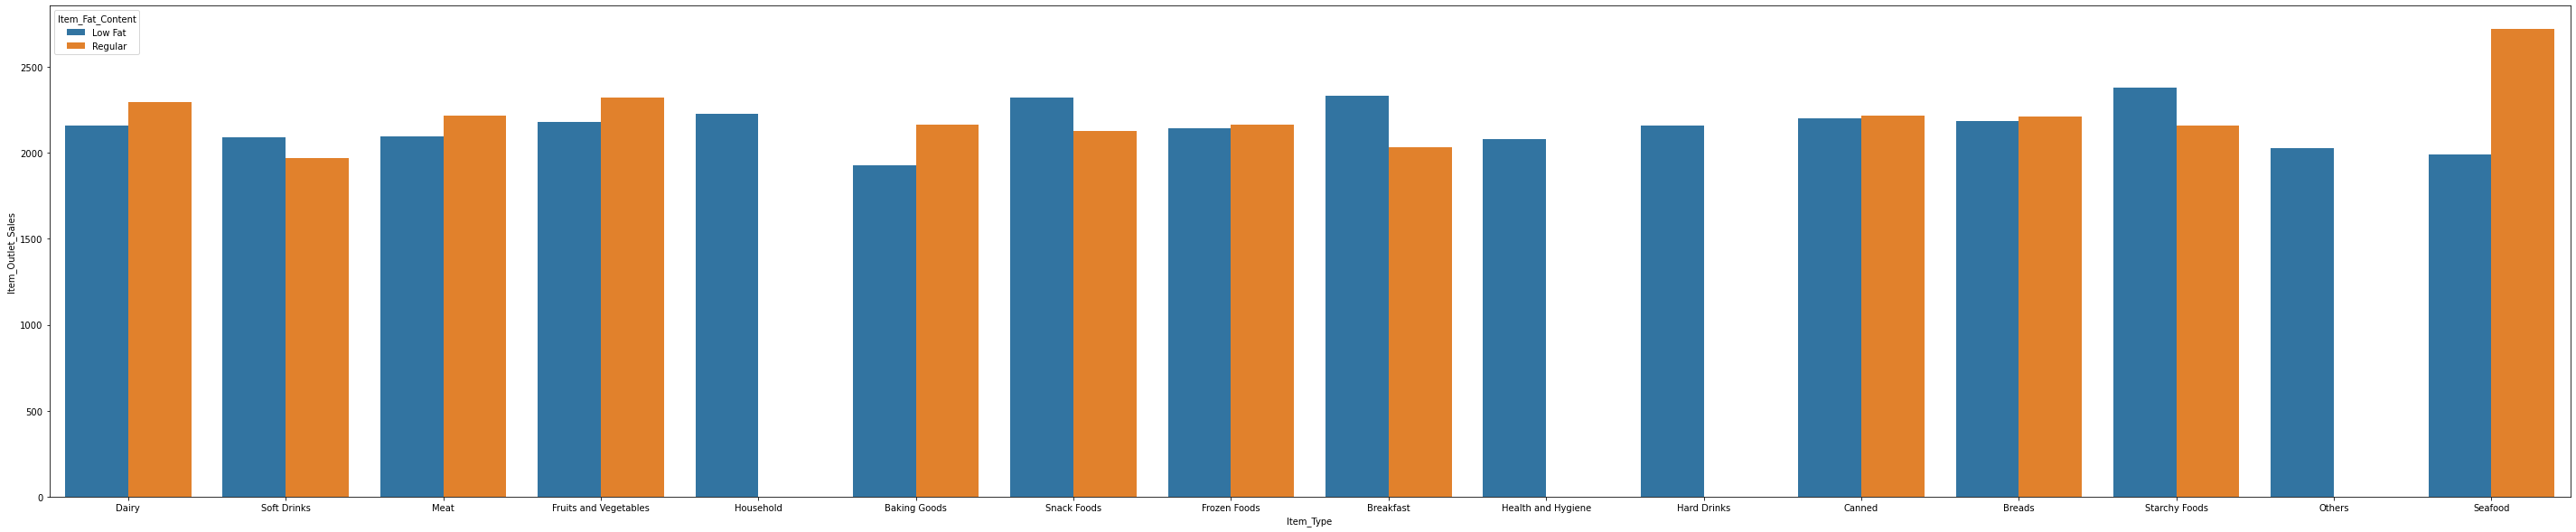

In [32]:
# bargraph Fat_Type_sales
plt.figure(figsize=(50,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=store_data,ci=None)
plt.show()

- SeaFood items with low fat have highest sales


# Data Preprocessing

In [33]:
# Converting non-numeric labeled column into categorical column

store_data["Item_Identifier"]=store_data["Item_Identifier"].astype("category")
store_data["Item_Fat_Content"]=store_data["Item_Fat_Content"].astype("category")
store_data["Item_Type"]=store_data["Item_Type"].astype("category")
store_data["Outlet_Identifier"]=store_data["Outlet_Identifier"].astype("category")
store_data["Outlet_Size"]=store_data["Outlet_Size"].astype("category")
store_data["Outlet_Location_Type"]=store_data["Outlet_Location_Type"].astype("category")
store_data["Outlet_Type"]=store_data["Outlet_Type"].astype("category")
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  category
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  category
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  category
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  category
 7   Outlet_Establishment_Year  14204 non-null  int64   
 8   Outlet_Size                14204 non-null  category
 9   Outlet_Location_Type       14204 non-null  category
 10  Outlet_Type                14204 non-null  category
 11  Item_Outlet_Sales          14204 non-null  float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 712.0 KB


In [34]:
# use label encoder to change categorical columns into numeric 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [35]:
store_data["Item_Identifier"]= label_encoder.fit_transform(store_data["Item_Identifier"])
store_data["Item_Fat_Content"]=label_encoder.fit_transform(store_data["Item_Fat_Content"])
store_data["Item_Type"]= label_encoder.fit_transform(store_data["Item_Type"])
store_data["Outlet_Identifier"]= label_encoder.fit_transform(store_data["Outlet_Identifier"])
store_data["Outlet_Size"]= label_encoder.fit_transform(store_data["Outlet_Size"])
store_data["Outlet_Location_Type"]= label_encoder.fit_transform(store_data["Outlet_Location_Type"])
store_data["Outlet_Type"]= label_encoder.fit_transform(store_data["Outlet_Type"])

In [36]:
store_data.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

- Now,all columns are changed into numeric data type

# Data scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
store_df_scaled=pd.DataFrame(scaler.fit_transform(store_data),columns=store_data.columns)

In [38]:
store_df_scaled.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


- Heatmap of correlation between variables

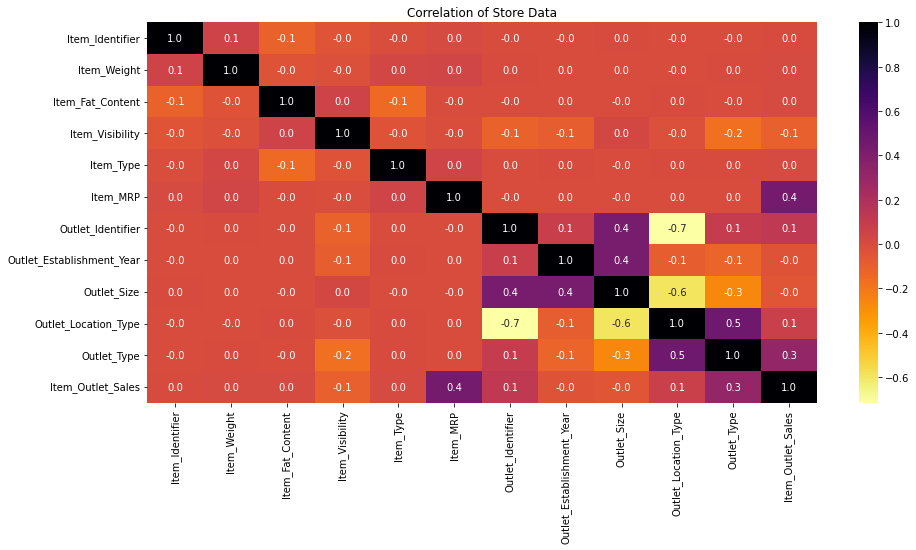

In [39]:
corr=store_df_scaled.corr()
plt.figure(figsize=(15,7))
hm=sns.heatmap(corr,annot=True,fmt=".1f",cbar=True,cmap="inferno_r")
hm.set(title="Correlation of Store Data")
plt.show()

- Outlet_Type and Item_MRP have a good positive correlation with Item_Outlet_sales

# Splitting Data

In [40]:
X=store_df_scaled.drop(columns="Item_Outlet_Sales",axis=1) # X stores the independent variables(features)
y=store_df_scaled["Item_Outlet_Sales"]                     # y stores the dependent (target,label) variable

In [41]:
X.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [42]:
y

0        0.283587
1        0.031419
2        0.158115
3        0.053555
4        0.073651
           ...   
14199    0.164551
14200    0.164551
14201    0.164551
14202    0.164551
14203    0.164551
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [43]:
#splitting dataframe using train_test_split() builtin method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("size of X_training data ",X_train.shape)
print("size of X_test data  ",X_test.shape)
print("size of y_train data ",y_train.shape)
print("size of y_test data ",y_test.shape)

size of X_training data  (11363, 11)
size of X_test data   (2841, 11)
size of y_train data  (11363,)
size of y_test data  (2841,)


# Linear Regression Model for all features

In [44]:
lr=LinearRegression() #Build the model


In [45]:
model1=lr.fit(X_train,y_train) # train the model
model1

LinearRegression()

In [46]:
r_sq1_lr=model1.score(X_train,y_train)
r_sq1_lr

0.3059537865396351

In [47]:
print("Coefficient of determination (R^2) ",r_sq1_lr)
print("intercept ",model1.intercept_)
print("slope",model1.coef_ )

Coefficient of determination (R^2)  0.3059537865396351
intercept  0.04165183598534995
slope [-0.00067841 -0.00182761  0.00315565 -0.03349251 -0.0043724   0.1730278
  0.02569177 -0.00286471 -0.00373641 -0.00678338  0.11456871]


In [48]:
y_pred =model1.predict(X_test)    # predict the model
print("predicted response ",y_pred)

predicted response  [0.21901562 0.21666659 0.19688767 ... 0.0365998  0.15442312 0.16161341]


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=mean_squared_error(y_test,y_pred,squared = False)
print("MSE value  ", MSE1, "\nRMSE value  ",  RMSE1)

MSE value   0.0067147509788736005 
RMSE value   0.08194358412269749


In [50]:
from sklearn.metrics import r2_score
r_sq2_lr=r2_score(y_test,y_pred)
print("R^2 for testing data ",r_sq2_lr)

R^2 for testing data  0.28586019411573627


In [52]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333


# Decision Tree Regressor

In [55]:
def rmsedt(score):
    rmsedt=np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmsedt)}')

In [56]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import  tree
kf=KFold(n_splits=5,shuffle=False,random_state=None)
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18] #hyperparameter tuning

for val in max_depth:
    score=cross_val_score(tree.DecisionTreeRegressor(max_depth=val,random_state=42),X,y,cv=kf,scoring="neg_mean_squared_error")
    print(f'For max depth  {val}')
    rmsedt(score.mean())

For max depth  1
rmse= 0.10
For max depth  2
rmse= 0.09
For max depth  3
rmse= 0.09
For max depth  4
rmse= 0.09
For max depth  5
rmse= 0.09
For max depth  6
rmse= 0.09
For max depth  7
rmse= 0.09
For max depth  8
rmse= 0.09
For max depth  9
rmse= 0.09
For max depth  10
rmse= 0.10
For max depth  11
rmse= 0.10
For max depth  12
rmse= 0.10
For max depth  13
rmse= 0.10
For max depth  14
rmse= 0.11
For max depth  15
rmse= 0.11
For max depth  17
rmse= 0.11
For max depth  18
rmse= 0.12


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

In [58]:
dtm=DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset  ",round(dtm.score(X_train,y_train),4))

dtm.fit(X_test,y_test)
print("R-Squared on test dataset  ",round(dtm.score(X_test,y_test),4))

R-Squared on train dataset   0.3534
R-Squared on test dataset   0.3522


In [59]:
y_pred_d=dtm.predict(X_test) 
y_pred_d

array([0.20063222, 0.19246384, 0.19246384, ..., 0.10069455, 0.139998  ,
       0.139998  ])

In [60]:
MSE_dt=mean_squared_error(y_test,y_pred_d)
MSE_dt

0.006091225721915404

In [61]:
RMSE_dt=np.sqrt(MSE_dt)
RMSE_dt

0.07804630498566478

In [62]:
r_sq1_dt=dtm.score(X_train,y_train)
r_sq1_dt

0.3189673385627856

In [63]:
r_sq2_dt=r2_score(y_test,y_pred)
print(r_sq2_dt)

0.28586019411573627


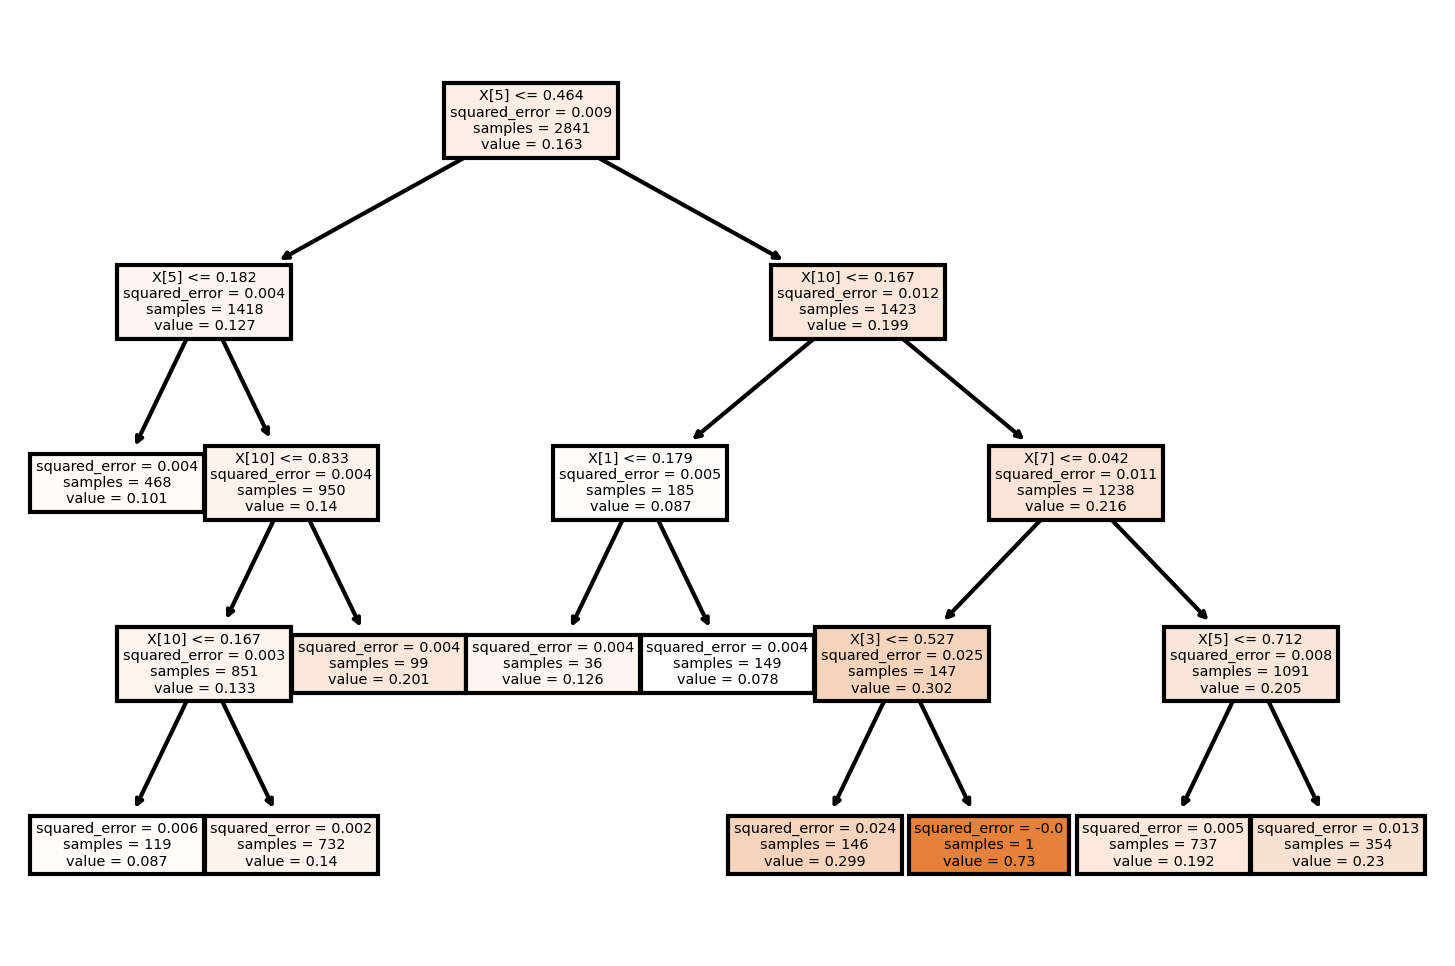

In [64]:
fig, axes=plt.subplots(dpi=300)
tree.plot_tree(dtm,filled=True);

# Random Forest regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split, KFold
from statistics import mean
import warnings
warnings.filterwarnings("ignore")

In [70]:
rf = RandomForestRegressor(random_state = 13, n_jobs = -1)

In [71]:
params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,10],
    'n_estimators': [10,25]
}

In [72]:
grid_search = GridSearchCV(estimator = rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "neg_root_mean_squared_error")

In [73]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [5, 10],
                         'n_estimators': [10, 25]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [74]:
grid_search.best_score_

-0.08196007090216464

In [75]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=25,
                      n_jobs=-1, random_state=13)

In [76]:
rfr=rf.fit(X_train, y_train)

In [77]:
y_pred_rf = rfr.predict(X_test)

In [78]:
MSE_rf = mean_squared_error(y_test, y_pred_rf)
MSE_rf

0.007066927442590275

In [79]:
RMSE_rf =np.sqrt(MSE_rf)
print("\nrandom forest MSE value  ", MSE_rf, "\nRMSE value  ",  RMSE_rf)


random forest MSE value   0.007066927442590275 
RMSE value   0.08406501913751209


In [80]:
r_sq1_rf = rfr.score(X_train, y_train)
r_sq1_rf

0.8996818181349463

In [81]:
r_sq2_rf=r2_score(y_test,y_pred)
print(r_sq2_rf)

0.28586019411573627


# Adaboost Regressor

In [82]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [83]:
# define the model
model_ada = AdaBoostRegressor()

# evaluate the model
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
n_scores = cross_val_score(model_ada, X, y, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1, error_score = 'raise')

# report performance
print('r2-Score: mean:(%.3f), min:(%.3f), max:(%.3f), std:(%.3f)' % (mean(n_scores), min(n_scores), max(n_scores), np.std(n_scores)))
mean(-n_scores)*100

r2-Score: mean:(-0.008), min:(-0.009), max:(-0.008), std:(0.000)


0.8246549620931423

In [84]:
model1_ada=model_ada.fit(X_train,y_train)
ada_score=model_ada.score(X_train, y_train)
y_pred_adaboost = model_ada.predict(X_test)
MSE_ada = mean_squared_error(y_test, y_pred_adaboost)
RMSE_ada = np.sqrt(MSE_ada)
print("MSE:",MSE_ada)
print("RMSE: ",RMSE_ada)
print('SCORE:',ada_score)

MSE: 0.007670244195517034
RMSE:  0.08757993032377358
SCORE: 0.25359412271953674


In [85]:
r_sq1_ada = model1_ada.score(X_train, y_train)
r_sq1_ada

0.25359412271953674

In [86]:
r_sq2_ada=r2_score(y_test,y_pred)
r_sq2_ada

0.28586019411573627

In [87]:
dff=pd.DataFrame({"R-square(train)":[r_sq1_lr,r_sq1_dt,r_sq1_rf,r_sq1_ada],"R-square(test)":[r_sq2_lr,r_sq2_dt,r_sq2_rf,r_sq2_ada],"RMSE":[RMSE1,RMSE_dt,RMSE_rf,RMSE_ada]},index=["Linear Regression","Decision Tree","Random Forest Regressor","Adaboost Regressor"])
dff

,R-square(train),R-square(test),RMSE
Linear Regression,0.305954,0.28586,0.081944
Decision Tree,0.318967,0.28586,0.078046
Random Forest Regressor,0.899682,0.28586,0.084065
Adaboost Regressor,0.253594,0.28586,0.087580


RMSE for Linear Regression =0.081 RMSE for Decision Tree Regression =0.078 RMSE for Random Forest Regression = 0.084 RMSE for Adaboost Regression =0.087

A low RMSE value indicates that the simulated and observed data are close to each other showing a better accuracy. Thus lower the RMSE better is model performance.

so from above RMSE values from different Models we can say that Decision Tree Regression has the Lowest RMSE value among all so the Decision Tree Regression is giving better performance among all.